In [1]:
# IMporting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection 

In [56]:
#Read Dataset  
data=pd.read_csv('Train.csv')
data.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [57]:
data.shape

(18506, 21)

In [58]:
data.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')

In [59]:
data.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

# Exploratory Data Analysis 

##  1.Univariate analysis

<AxesSubplot:xlabel='first_trip_tz', ylabel='count'>

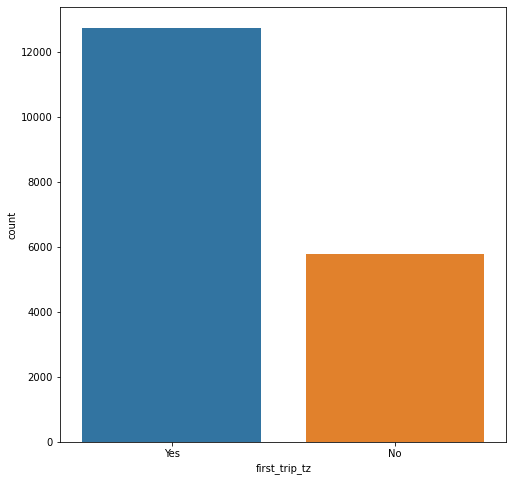

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x='first_trip_tz',data=data)

<AxesSubplot:xlabel='cost_category', ylabel='count'>

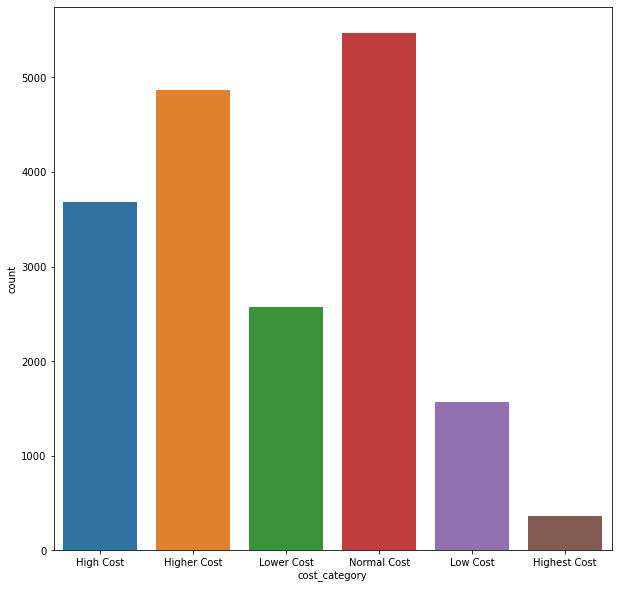

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='cost_category',data=data)

<AxesSubplot:xlabel='age_group', ylabel='count'>

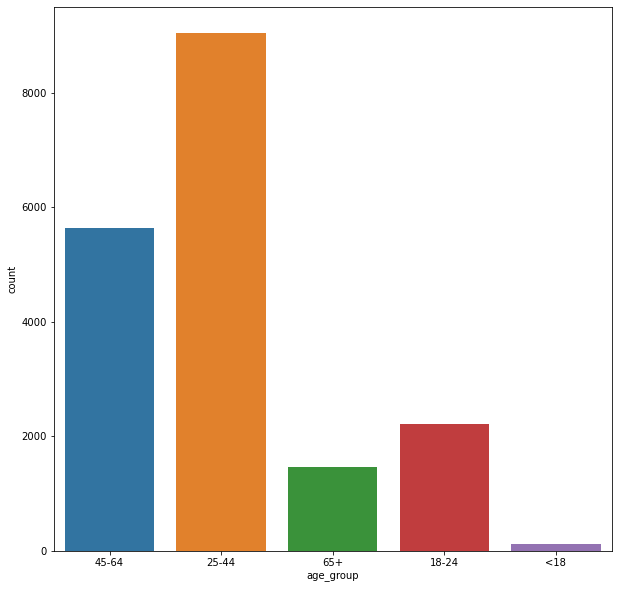

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x='age_group',data=data)

<AxesSubplot:xlabel='purpose', ylabel='count'>

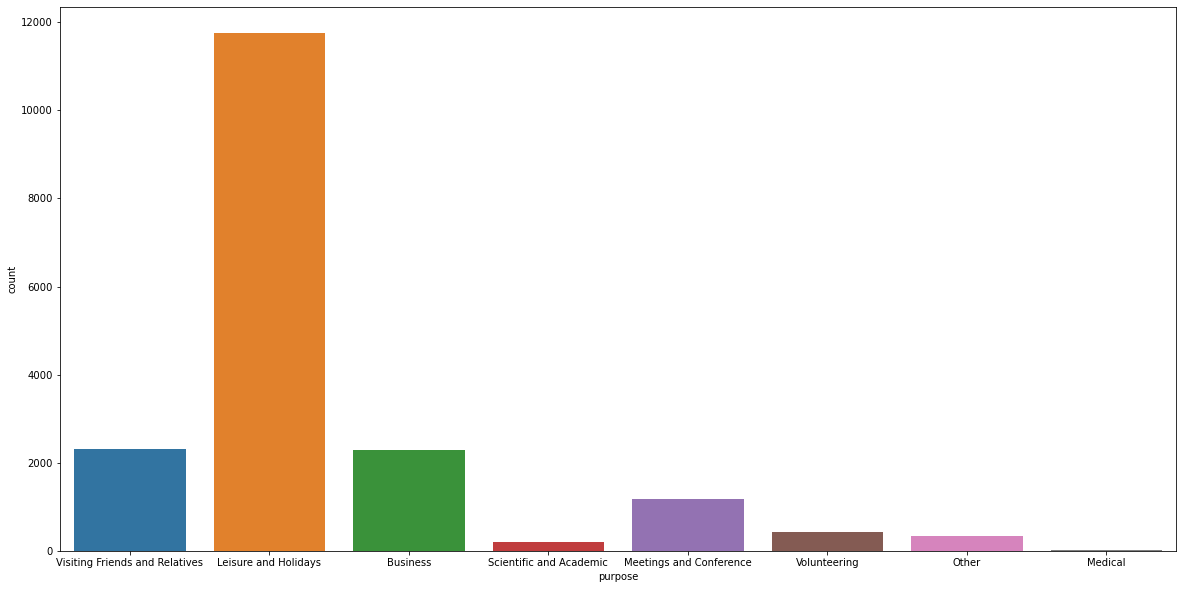

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose',data=data)

##  2.Bivariate analysis

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='night_zanzibar', ylabel='night_mainland'>

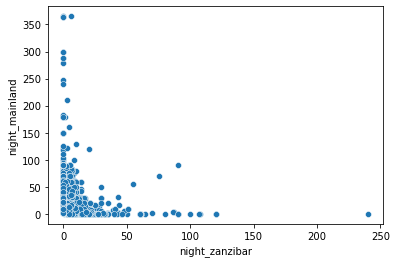

In [12]:
sns.scatterplot(data['night_zanzibar'],data['night_mainland'])

C:\Users\SEETHU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='night_zanzibar', ylabel='night_mainland'>

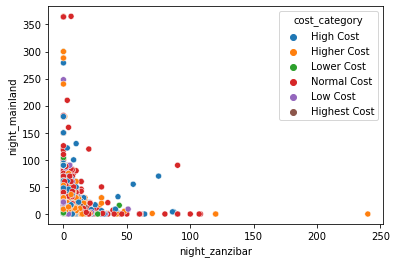

In [13]:
sns.scatterplot(data['night_zanzibar'],data['night_mainland'],hue=data['cost_category'])

# PreProcessing

##  1.Missing value Handling

In [60]:
data.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

There are 1075 missing values in the column travel_with , 2 in the column total_female and 6 in the total_male

In [61]:
data['total_female']=data['total_female'].fillna(data['total_female'].median())

In [62]:
data['total_male']=data['total_male'].fillna(data['total_male'].median())

In [63]:
data.ffill(axis=0,inplace=True)

In [64]:
data.isna().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

Now all the missing values are replaced

## 2.Outlier detection and handling

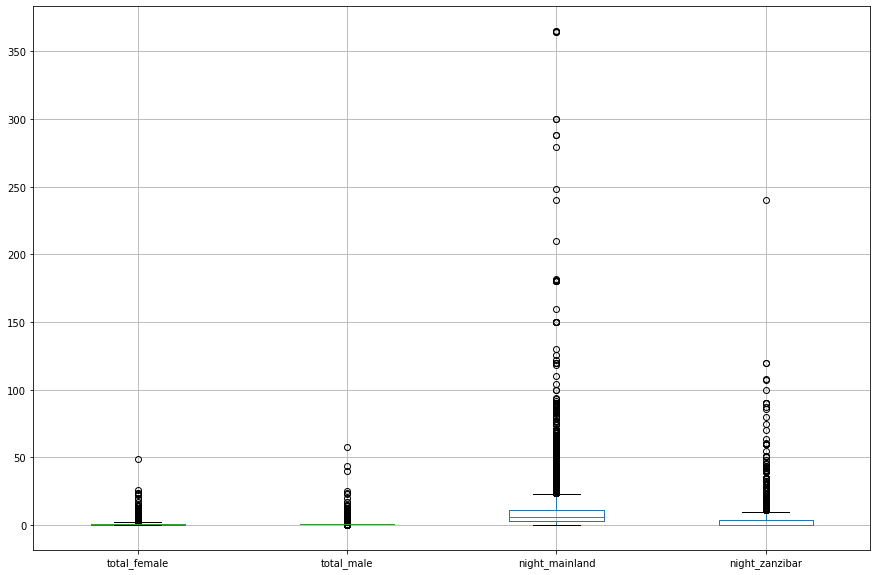

In [65]:
data.boxplot(figsize=(15,10))
plt.show()

In [75]:
Q1=np.percentile(data['night_mainland'],25,interpolation='midpoint')
Q2=np.percentile(data['night_mainland'],50,interpolation='midpoint')
Q3=np.percentile(data['night_mainland'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['night_mainland']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['night_mainland']>uplim
x=data.loc[ind1].index

In [76]:
data.drop(x,inplace = True)

In [68]:
Q1=np.percentile(data['night_zanzibar'],25,interpolation='midpoint')
Q2=np.percentile(data['night_zanzibar'],50,interpolation='midpoint')
Q3=np.percentile(data['night_zanzibar'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['night_zanzibar']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['night_zanzibar']>uplim
y=data.loc[ind1].index

In [69]:
data.drop(y,inplace = True)

In [70]:
Q1=np.percentile(data['total_female'],25,interpolation='midpoint')
Q2=np.percentile(data['total_female'],50,interpolation='midpoint')
Q3=np.percentile(data['total_female'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['total_female']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['total_female']>uplim
m=data.loc[ind1].index

In [71]:
data.drop(m,inplace = True)

In [72]:
Q1=np.percentile(data['total_male'],25,interpolation='midpoint')
Q2=np.percentile(data['total_male'],50,interpolation='midpoint')
Q3=np.percentile(data['total_male'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
outlier = []
for x in data['total_male']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['total_male']>uplim
n=data.loc[ind1].index

In [73]:
data.drop(n,inplace = True)

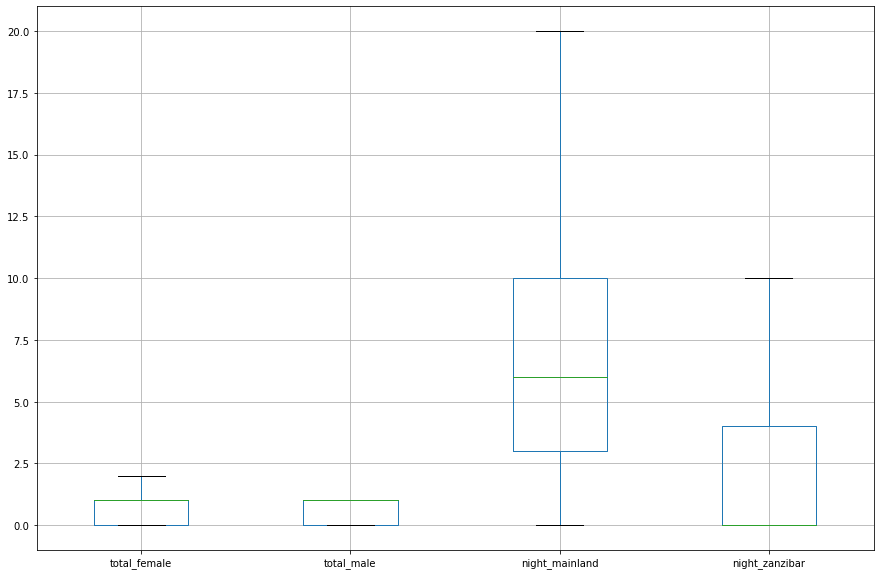

In [77]:
data.boxplot(figsize=(15,10))
plt.show()

## 3.Encoding

In [78]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder
laben =LabelEncoder()
a=['travel_with','purpose','main_activity','info_source','cost_category','age_group','tour_arrangement','country']
for i in np.arange(len(a)):
    data[a[i]]=laben.fit_transform(data[a[i]])

In [79]:
data.dtypes

Tour_ID                   object
country                    int32
age_group                  int32
travel_with                int32
total_female             float64
total_male               float64
purpose                    int32
main_activity              int32
info_source                int32
tour_arrangement           int32
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category              int32
dtype: object

In [80]:
# One hot encoding

dummies = pd.get_dummies(data[['tour_arrangement','package_transport_int','package_accomodation','package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','first_trip_tz']], drop_first=True)
data = pd.concat([data.drop(['tour_arrangement','package_transport_int','package_accomodation','package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','first_trip_tz'],axis=1), dummies],axis=1)


## 4.Feature reduction

In [81]:
# Checking columns
data.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'night_mainland', 'night_zanzibar', 'cost_category', 'tour_arrangement',
       'package_transport_int_Yes', 'package_accomodation_Yes',
       'package_food_Yes', 'package_transport_tz_Yes',
       'package_sightseeing_Yes', 'package_guided_tour_Yes',
       'package_insurance_Yes', 'first_trip_tz_Yes'],
      dtype='object')

In [82]:
# Combining 'total_male'  and 'total_female'

data['total_size']=data['total_male']+data['total_female']
data.drop(['total_male'],axis=1,inplace=True)
data.drop(['total_female'],axis=1,inplace=True)

In [83]:
data.drop(['Tour_ID'],axis=1,inplace=True)

<AxesSubplot:>

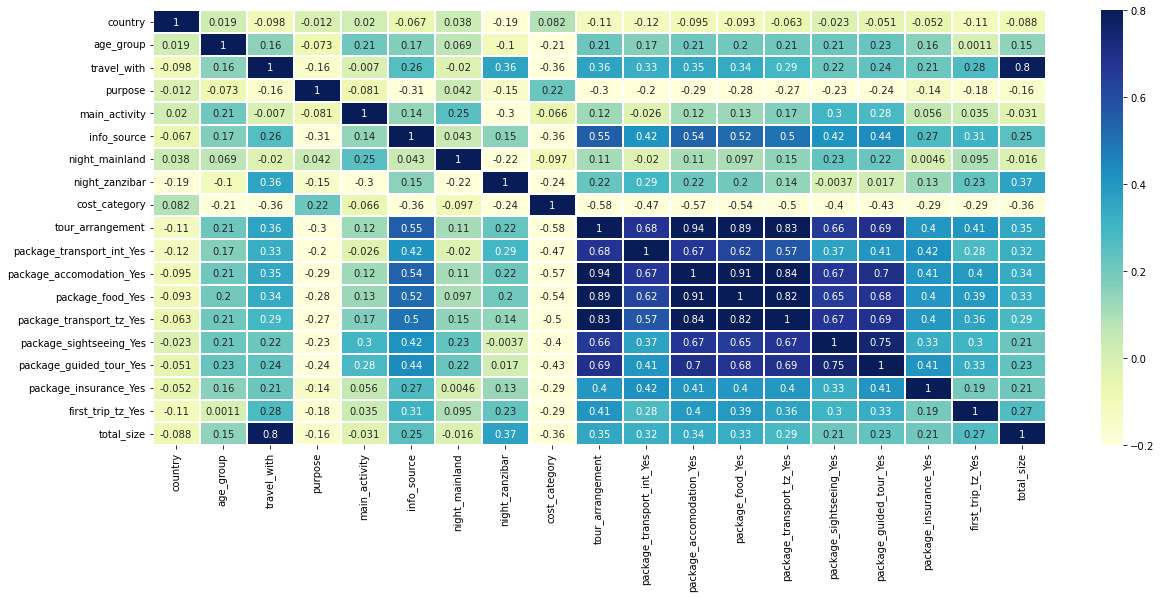

In [84]:
# Correlation Analysis of entire data set
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=0.2,cmap='YlGnBu')

In [85]:
data.describe()

,country,age_group,travel_with,purpose,main_activity,info_source,night_mainland,night_zanzibar,cost_category,tour_arrangement,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,first_trip_tz_Yes,total_size
count,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000
mean,80.902465,1.391576,1.347876,1.736937,5.226479,3.868756,6.456192,1.793287,2.649968,0.513405,0.337670,0.496298,0.465464,0.427658,0.321570,0.343060,0.149429,0.687271,1.459139
std,40.350455,0.809513,1.426518,1.858323,3.339211,3.088175,4.788043,2.804481,2.004691,0.499838,0.472932,0.500004,0.498824,0.494757,0.467096,0.474749,0.356523,0.463622,0.563979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,103.000000,1.000000,0.000000,1.000000,6.000000,4.000000,6.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,119.000000,2.000000,3.000000,1.000000,8.000000,7.000000,10.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,126.000000,4.000000,4.000000,7.000000,9.000000,7.000000,20.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## 5.Standardization/Normalization

In [86]:
from sklearn.preprocessing import StandardScaler
stdscl=StandardScaler()
data['country']=stdscl.fit_transform(data[['country']])

In [87]:
data.describe()

,country,age_group,travel_with,purpose,main_activity,info_source,night_mainland,night_zanzibar,cost_category,tour_arrangement,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,first_trip_tz_Yes,total_size
count,1.391300e+04,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000,13913.000000
mean,5.301907e-16,1.391576,1.347876,1.736937,5.226479,3.868756,6.456192,1.793287,2.649968,0.513405,0.337670,0.496298,0.465464,0.427658,0.321570,0.343060,0.149429,0.687271,1.459139
std,1.000036e+00,0.809513,1.426518,1.858323,3.339211,3.088175,4.788043,2.804481,2.004691,0.499838,0.472932,0.500004,0.498824,0.494757,0.467096,0.474749,0.356523,0.463622,0.563979
min,-2.005067e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.154468e-01,1.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.476600e-01,1.000000,0.000000,1.000000,6.000000,4.000000,6.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,9.442001e-01,2.000000,3.000000,1.000000,8.000000,7.000000,10.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,1.117686e+00,4.000000,4.000000,7.000000,9.000000,7.000000,20.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## 6.Feature Engineering

In [88]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=data.drop(['cost_category'],axis=1)
y=pd.DataFrame(data['cost_category'])

In [89]:
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Modelling

In [91]:
# Model 1 : Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

C:\Users\SEETHU\AppData\Local\Temp\ipykernel_11932\9100128.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [92]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',round(f1_score(y_test,y_pred,average='micro'),3))
print('Accuracy :',round(accuracy_score(y_test,y_pred),3)) 

Confusion matrix : 
 [[377 241   5   4  14 205]
 [180 719   8   5   3  86]
 [ 16  42   4   1   0   0]
 [ 16  15   0  43 130 170]
 [ 18  17   2  50 378 165]
 [158  91   4  74 142 791]]
F1_score : 0.554
Accuracy : 0.554


In [93]:
# Model 2 : Logistic Regression

from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions= logmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy is:  0.5359367513176809


C:\Users\SEETHU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
# Model 3 : DecisionTreeClassifier

from sklearn.tree  import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
predictions= dtmodel.predict(x_test)
print('Accuracy is: ',accuracy_score(y_test,predictions))

Accuracy is:  0.4772400574988021


Of these three models, Random Forest Model has better accuracy of about 0.554 than the logistic regression model and the decision tree model.Hence we can predict the outcome using the Random Forest Model

# Model fine tuning

In [100]:
rf.fit(x_train,y_train)
rft=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
print('F1 score : ',f1_score(y_test,y_pred,average='micro'))
print('Accuracy : ', accuracy_score(y_test,y_pred))

C:\Users\SEETHU\AppData\Local\Temp\ipykernel_11932\546030808.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\SEETHU\AppData\Local\Temp\ipykernel_11932\546030808.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(x_train,y_train)


F1 score :  0.579060852898898
Accuracy :  0.579060852898898


After fine tuning of the Random forest model, the accuracy is improved to 0.579